## 2- Preparo dos Dados

#### Conferindo a Normalidade e Subagrupando

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [59]:
i=pd.read_csv('~/comex/data/imp3.csv')

In [60]:
i=i.groupby(by=['ANO','MES','NCM'])[['KG','FOB','FRETE']]\
.sum()\
.reset_index()\
.sort_values(by=['ANO','MES','NCM'])\
.reset_index(drop=True)

Text(0.5, 0.98, 'Importações')

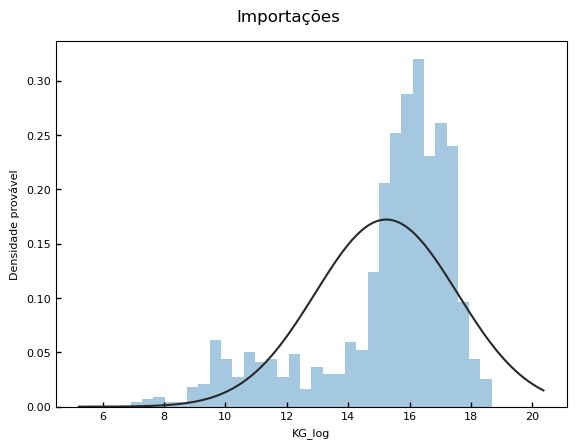

In [61]:
fig, ax=plt.subplots(sharex=True)

g=sns.distplot(np.log(i.KG), fit=norm, kde=False, ax=ax)
ax.tick_params(axis='x',direction='in',width=1, labelsize=8)
ax.tick_params(axis='y',direction='in',width=1, labelsize=8)
ax.set_ylabel('Densidade provável',fontdict={'fontsize':8})
ax.set_xlabel('KG_log',fontdict={'fontsize':8})

    
fig.tight_layout(pad=3)
fig.suptitle('Importações')

#plt.show()

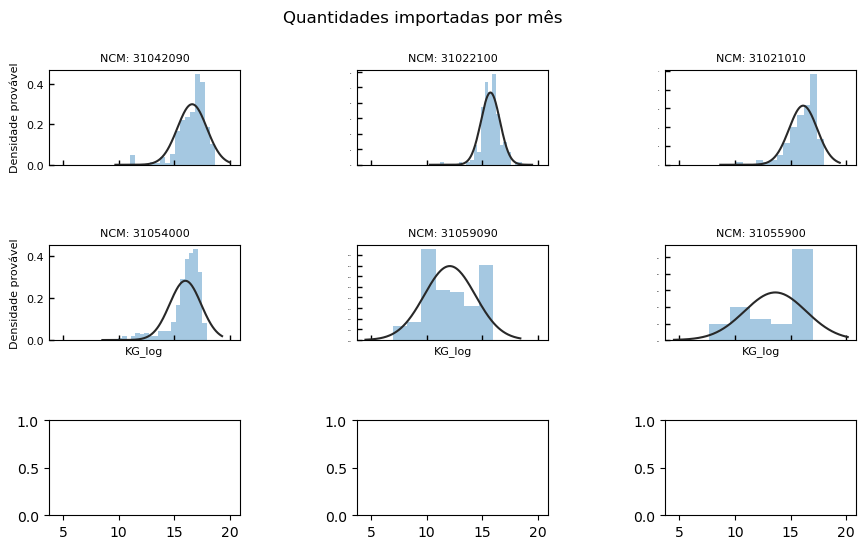

In [62]:
fig, ax=plt.subplots(3,3, sharex=True)

from scipy.stats import norm
l=0
c=0

for ncm in i.NCM.unique():
    it=i[i.NCM==ncm]
    g=sns.distplot(np.log(it.KG), fit=norm, kde=False, ax=ax[l,c])
    g.set_title(f"NCM: {ncm}", fontdict={'fontsize':8})
    ax[l,c].tick_params(axis='x',direction='in',width=1, labelsize=8)
    ax[l,c].tick_params(axis='y',direction='in',width=1, labelsize=8)
    ax[l,c].set_ylabel('Densidade provável',fontdict={'fontsize':8})
    ax[l,c].set_xlabel('KG_log',fontdict={'fontsize':8})
    
    if l==0:
        ax[l,c].set_xlabel('')
    
    
    if c!=0:
        ax[l,c].set_ylabel('')
        ax[l,c].tick_params(axis='y',direction='in',width=1, labelsize=0)
        
    
    c+=1
    if c==3:
        c=0
        l+=1

fig.tight_layout(pad=3)
fig.suptitle('Quantidades importadas por mês')
fig.set_size_inches(10,6)

#plt.show()

Nesses NCMs abaixo, a normalização foi somente o corte de valores menor que um mínimo estipulado simplesmente visualisando os gráficos acima.

In [63]:
i=i[(i.NCM!=31042090)|(i.KG>np.exp(14))]
i=i[(i.NCM!=31022100)|(i.KG>np.exp(13))]
i=i[(i.NCM!=31021010)|(i.KG>np.exp(12.5))]
i=i[(i.NCM!=31054000)|(i.KG>np.exp(14))]

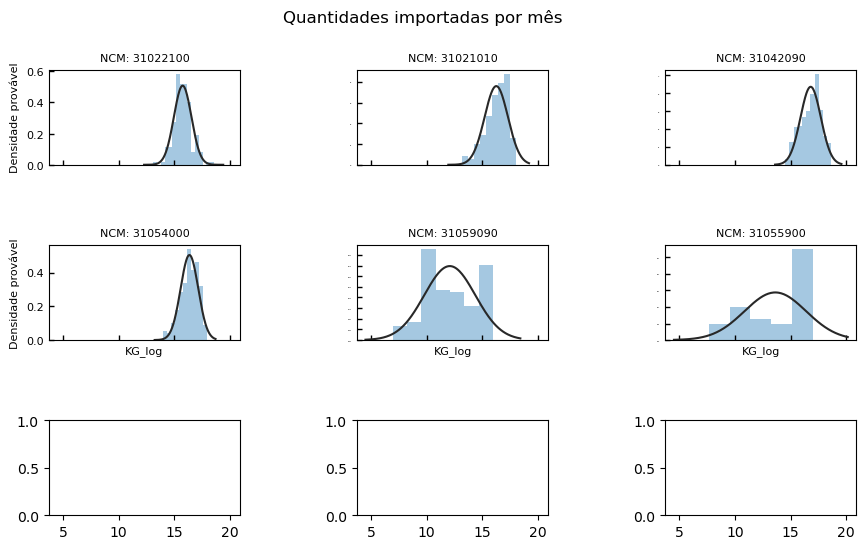

In [64]:
fig, ax=plt.subplots(3,3, sharex=True)

from scipy.stats import norm
l=0
c=0

for ncm in i.NCM.unique():
    it=i[i.NCM==ncm]
    g=sns.distplot(np.log(it.KG), fit=norm, kde=False, ax=ax[l,c])
    g.set_title(f"NCM: {ncm}", fontdict={'fontsize':8})
    ax[l,c].tick_params(axis='x',direction='in',width=1, labelsize=8)
    ax[l,c].tick_params(axis='y',direction='in',width=1, labelsize=8)
    ax[l,c].set_ylabel('Densidade provável',fontdict={'fontsize':8})
    ax[l,c].set_xlabel('KG_log',fontdict={'fontsize':8})
    
    if l==0:
        ax[l,c].set_xlabel('')
    
    
    if c!=0:
        ax[l,c].set_ylabel('')
        ax[l,c].tick_params(axis='y',direction='in',width=1, labelsize=0)
        
    
    c+=1
    if c==3:
        c=0
        l+=1

fig.tight_layout(pad=3)
fig.suptitle('Quantidades importadas por mês')
fig.set_size_inches(10,6)

#plt.show()

Já nos NCMs não normalizados no procedimento anterior, esses passarão a seguir por processo de subagrupamento ou clusterização, através de algorítmo de _machine learning_, e o subagrupamento de maior quantidade média seguirá em análise preditiva.  

Todos os NCMs receberão um sufixo numérico, que identificará o tratamento de subagrupamento por que passaram.



##### Segmentando por NCM

In [65]:
k=1

In [66]:
km_ncm={31042090:k,31059090:3,31022100:k,31021010:k,31054000:k,31055900:3}

In [67]:
i=i[i.FRETE>0]

In [68]:
i['KG_l']=np.log(i.KG)
i['FOB_l']=np.log(i.FOB)
i['FRETE_l']=np.log(i.FRETE)

i['KG_']=2*(i.KG_l)/i.KG_l.max()
i['FOB_']=i.FOB_l/i.FOB_l.max()
i['FRETE_']=i.FRETE_l/i.FRETE_l.max()

In [69]:
q=pd.DataFrame()
for ncm in i.NCM.unique():
    from sklearn.cluster import KMeans as model
    model=model(n_clusters=km_ncm[ncm],n_init='auto')
    it=i[i.NCM==ncm]
    it=it[it.FRETE>0]
    it.insert(3,'KM',model.fit_predict(it[['KG_','FOB_','FRETE_']]))
    q=pd.concat([q,it])
i=q.copy()

In [70]:
ncms=i.NCM.unique().tolist()
ncm_index=np.arange(0,len(ncms))
z=zip(ncms,ncm_index)
ncm_dict=dict(z)
ncm_dict

{31022100: 0, 31021010: 1, 31042090: 2, 31054000: 3, 31059090: 4, 31055900: 5}

In [71]:
c=0
cc=max(list(km_ncm.values()))
cc

3

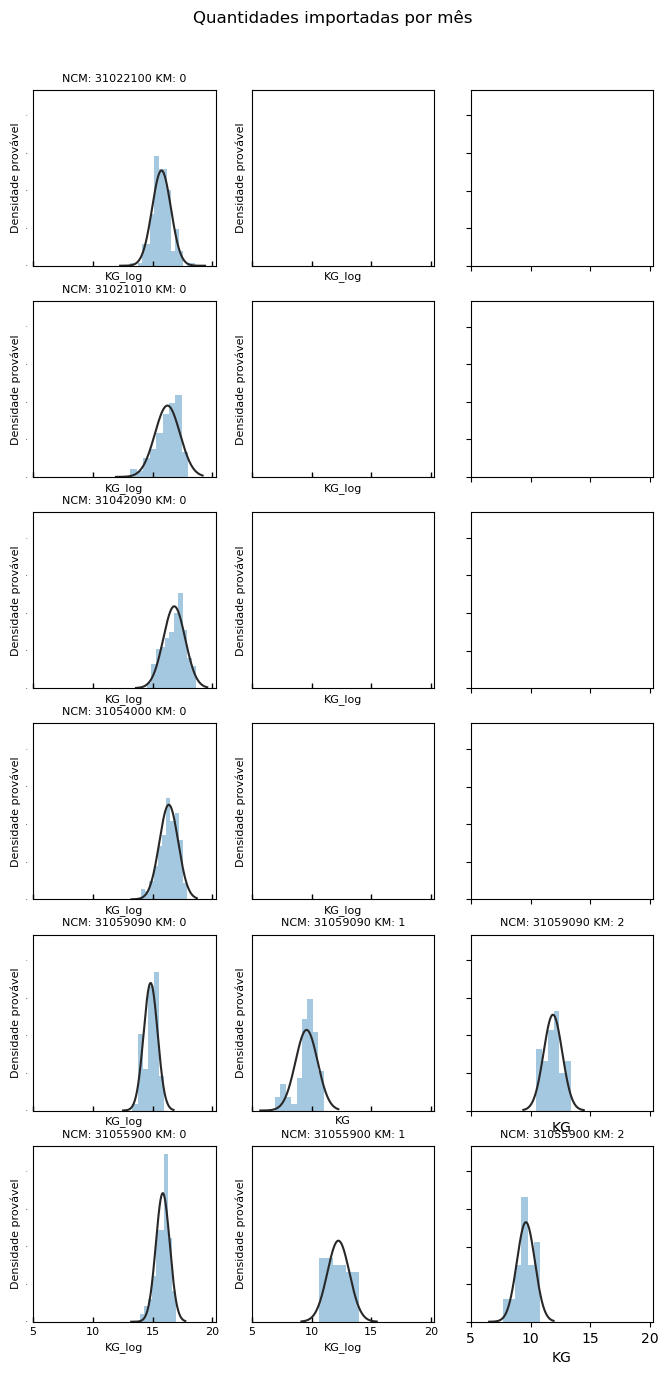

In [72]:
fig, ax=plt.subplots(len(i.NCM.drop_duplicates()),cc, sharex=True,sharey=True)

from scipy.stats import norm

for ncm in i.NCM.unique():
    for km in i.KM.unique():
        it=i[(i.NCM==ncm)&(i.KM==km)]
        
        ax[ncm_dict[ncm],c].tick_params(axis='x',direction='in',width=1, labelsize=8)
        ax[ncm_dict[ncm],c].tick_params(axis='y',direction='in',width=0, labelsize=0)
        ax[ncm_dict[ncm],c].set_ylabel('Densidade provável',fontdict={'fontsize':8})
        ax[ncm_dict[ncm],c].set_xlabel('KG_log',fontdict={'fontsize':8})

        
        if len(it)>1:
            g=sns.distplot(np.log(it.KG), fit=norm, kde=False, ax=ax[ncm_dict[ncm],km])

            g.set_title(f"NCM: {ncm} KM: {km}", fontdict={'fontsize':8})

        
                

            

        c+=1
        if c==cc-1:
            c=0
            l+=1

fig.tight_layout(pad=10)
fig.suptitle('Quantidades importadas por mês',y=.93)
fig.set_size_inches(8,16)

#plt.show()

In [73]:
i.NCM=i.NCM.astype(str)+'-'+i.KM.astype(str)

i=i.drop(columns='KM')

i.NCM.unique()

array(['31022100-0', '31021010-0', '31042090-0', '31054000-0',
       '31059090-1', '31059090-2', '31059090-0', '31055900-2',
       '31055900-1', '31055900-0'], dtype=object)

In [74]:
im=i.groupby(by=['NCM']).KG.mean().reset_index()
# Filtra o ncmkm de maior peso
#im=im.sort_values(by=['NCM','KG']).drop_duplicates(subset=['NCM'],keep='last')[['NCM','KM']]
#Filtra o NCM KM com média acima de exp(15)(3 mil ton) KG
im=im[im.KG>np.exp(14)]

In [75]:
i=i.merge(im.NCM)

In [76]:
i.to_csv('~/comex/data/imp4.csv',index=False)